In [1]:
#Importing required modules
import pandas as pd
import numpy as np 
import nltk

In [2]:
#creating a pandas dataframe with the CSV file provided
df = pd.read_csv(r"C:\Users\elizabeth\Documents\Luca's scraping\standardised_cyber_tweets_19082020.csv")

In [127]:
df.head()

,Unnamed: 0,user_id,name,screen_name,location,user_description,user_friends_n,user_followers_n,listed_count,prof_created_at,...,is_quote_status,retweet_count,favourite_count,hashtags,mentions,source_device,retweeted,retweet_text,quote_text,quote_screen_name
0,0,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,False,10,0,[],"[{'screen_name': 'pwonacott', 'name': 'Peter W...",Twitter for iPhone,False,Behind the Beirut Explosion: Seven Years of Of...,None,None
1,1,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,False,5050,0,[],"[{'screen_name': 'WSJ', 'name': 'The Wall Stre...",Twitter for iPhone,False,The Bill &amp; Melinda Gates Foundation said i...,None,None
2,2,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,False,0,0,[],"[{'screen_name': 'dnvolz', 'name': 'Dustin Vol...",Twitter for iPhone,False,None,None,None
3,3,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,False,1,0,[],"[{'screen_name': 'margheritamvs', 'name': 'Mar...",Twitter for iPhone,False,"A heartbreaking tale, beautifully told by @Abi...",None,None
4,4,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,False,474,0,[],"[{'screen_name': 'Kate_OKeeffe', 'name': ""Kate...",Twitter for iPhone,False,The Trump administration just recommended a pl...,None,None


In [128]:
print(len(df))

27842


In [129]:
column_names = list(df.columns)
column_names

['Unnamed: 0',
 'user_id',
 'name',
 'screen_name',
 'location',
 'user_description',
 'user_friends_n',
 'user_followers_n',
 'listed_count',
 'prof_created_at',
 'favourites_count',
 'verified',
 'statuses_count',
 'contributors_enabled',
 'tweet_created_at',
 'tweet_id',
 'text',
 'truncated',
 'display_text_range',
 'source',
 'source_url',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'in_reply_to_screen_name',
 'is_quote_status',
 'retweet_count',
 'favourite_count',
 'hashtags',
 'mentions',
 'source_device',
 'retweeted',
 'retweet_text',
 'quote_text',
 'quote_screen_name']

In [210]:
df['tweet_id'][0:10]

0    1.292082e+18
1    1.291841e+18
2    1.291814e+18
3    1.291658e+18
4    1.291553e+18
5    1.291409e+18
6    1.291405e+18
7    1.291402e+18
8    1.291401e+18
9    1.291401e+18
Name: tweet_id, dtype: float64

In [130]:
#preprocessing - first glanses at the data 
column_names = list(df.columns)
unique_values = list()
for col in df:
    unique_values.append(df[col].unique())
number_unique_values = list()
for col in df:
    number_unique_values.append(len(df[col].unique()))

In [131]:
#a summary table fo unique information 
summary_table = pd.DataFrame(column_names)
summary_table.columns=['column names']
summary_table['unique values'] = unique_values
summary_table['number of unique values'] = number_unique_values
summary_table

,column names,unique values,number of unique values
0,Unnamed: 0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",3245
1,user_id,"[244169661, 21644992, 19883587, 242355547, 165...",12
2,name,"[jenny strasburg, Dan Simmons, Leo Kelion, Gor...",12
3,screen_name,"[jennystrasburg, dannsimmons, LeoKelion, gordo...",12
4,location,"[London, London, England, nan, DMs Open, San F...",5
5,user_description,[WSJ reporter/New Mexican in London. Cyber(cri...,12
6,user_friends_n,"[2843, 295, 4760, 1271, 2714, 506, 888, 4319, ...",12
7,user_followers_n,"[5557, 12481, 11831, 11832, 13636, 10933, 646,...",14
8,listed_count,"[199, 315, 400, 397, 241, 20, 567, 83, 116, 20...",12
9,prof_created_at,"[2011-01-28 17:33:33, 2009-02-23 10:53:15, 200...",12


In [3]:
import re

In [133]:
print(df['tweet_created_at'][0])

2020-08-08 12:56:56


In [134]:
#I want to split the date so we can .groupby() 

df1 = df['tweet_created_at'].str.split(expand=True)
df1.columns = ['date', 'time']
df_date = df1['date'].str.split('-', expand=True)
df_date.columns = ['year', 'month', 'date']
df_time = df1['time'].str.split(':', expand=True)
df_time.columns = ['hour', 'minute', 'second']
df_date_time = pd.concat((df_date, df_time), axis=1)
df_date_time.head()
df = pd.concat((df, df_date_time), axis=1)
#drop date and change date1 to date

In [135]:
df = df[df['year'] == '2020'].copy()


In [136]:
print(df['text'][0:3])

0    RT @pwonacott: Behind the Beirut Explosion: Se...
1    RT @WSJ: The Bill &amp; Melinda Gates Foundati...
2    In a public report, senior counterintelligence...
Name: text, dtype: object


In [137]:
print(df['hashtags'][53:56])

53         [{'text': 'COVID', 'indices': [39, 45]}]
54                                               []
55    [{'text': 'TheJournal', 'indices': [27, 38]}]
Name: hashtags, dtype: object


In [4]:
def find_callouts(text):
    list_callouts = []
    for i in range(0,text.shape[0]):
        callout_temp = re.findall(r'\@\w+',text.iloc[i])
        list_callouts.append(callout_temp)
    return list_callouts
callouts = find_callouts(df['text'])
df['callouts'] = callouts

In [5]:
def find_hashtags(text):
    list_hashtags = []
    for i in range(0,text.shape[0]):
        hashtag_temp = re.findall(r'\#(\w+)',text.iloc[i])
        list_hashtags.append(hashtag_temp)
    return list_hashtags
df['hashtag1'] = find_hashtags(df['text'])

In [6]:
# make a new column to highlight retweets
df['is_retweet'] = df['text'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

0

In [141]:
df['hashtag1'][53:56]

53         [COVID]
54              []
55    [TheJournal]
Name: hashtag1, dtype: object

In [7]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#','',text) #remove hashtags
    text = re.findall(r'[A-Za-z]+',text)
    text = [' '.join(text)] 
    return text
df['clean_tweet'] = df['text'].apply(lambda x: clean_text(x))

In [8]:
df['clean_tweet'][0]

['Arrests Several prominent accounts including those of Joe Biden and Elon Musk were taken over to promote a cryptocurrency scam in the July incident via']

In [9]:
pip install gensim==3.8.3

Note: you may need to restart the kernel to use updated packages.


# LDA

In [10]:
import gensim

In [11]:
# import packages for stopword removal 
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk.util import ngrams

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elizabeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elizabeth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
#adding 'RT' (retweet) to list of words to remove  
stop_words_nltk = stopwords.words('english')
stop_words_nltk.extend(['rt', 'u', 'r', 'ur'])

In [13]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

  Using cached plac-1.1.3-py2.py3-none-any.whl (20 kB)
  Using cached catalogue-1.0.0-py2.py3-none-any.whl (7.7 kB)
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047114 sha256=4d9c5719eb33aa772a2e590cca82be9fa68479d4efc20123ebc622b1c83c3ef0
  Stored in directory: C:\Users\ELIZAB~1\AppData\Local\Temp\pip-ephem-wheel-cache-1__y99l6\wheels\10\6f\a6\ddd8204ceecdedddea923f8514e13afb0c1f0f556d2c9c3da0
Successfully built en-core-web-sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [14]:
import spacy

# loading english language model of spaCy
en_model = spacy.load('en_core_web_sm')

# gettign the list of default stop words in spaCy english model
stop_words = en_model.Defaults.stop_words
stop_words = list(stop_words)
stop_words.extend(stop_words_nltk)

In [152]:
len(stop_words)

509

In [153]:
stop_words

['by',
 "'re",
 'cannot',
 'ourselves',
 'for',
 'its',
 'to',
 'until',
 'an',
 'unless',
 'always',
 'most',
 'are',
 'and',
 'two',
 'top',
 'except',
 'therein',
 'own',
 'even',
 'via',
 'formerly',
 'give',
 'serious',
 'well',
 'all',
 'eight',
 'namely',
 'enough',
 'behind',
 'does',
 "'d",
 'mostly',
 'yourselves',
 'moreover',
 'back',
 '’d',
 'not',
 'do',
 'nevertheless',
 '‘ll',
 'did',
 'quite',
 'really',
 'which',
 'against',
 'amount',
 'nowhere',
 'although',
 'bottom',
 'she',
 'various',
 'my',
 'above',
 'least',
 'sometime',
 'whether',
 'were',
 'sixty',
 'on',
 'others',
 'or',
 'should',
 'other',
 'with',
 'anyway',
 'fifteen',
 "n't",
 'i',
 'forty',
 'across',
 'have',
 'none',
 're',
 'would',
 'beside',
 'nine',
 'becomes',
 'twenty',
 'that',
 'some',
 'just',
 'also',
 'side',
 'already',
 'same',
 '’ve',
 'only',
 'part',
 'thru',
 'me',
 'another',
 'afterwards',
 'anyone',
 'when',
 'thus',
 'those',
 'during',
 'ten',
 'am',
 'down',
 'become',
 'ou

In [154]:
#this is slow -compared to the tokenization in sklearn
def normalized_df_text(text): #normalizing, stop word removal, & lementizing
    normalized =[]
    for i in range(0,text.shape[0]):
        norm_temp = re.findall(r'[A-Za-z]+',text.iloc[i]) #taking all words (leaving punctuation out)
        norm_temp = [w.lower() for w in norm_temp] # putting words in lower case
        norm_temp = [w for w in norm_temp if not w in stop_words] # removing stopwords
        lemma = WordNetLemmatizer()
        norm_temp = [lemma.lemmatize(w, pos = "v") for w in norm_temp] #lemmatizing verbs
        norm_temp = [lemma.lemmatize(w, pos = "n") for w in norm_temp] #lemmatizing nouns
        norm_temp = [' '.join(norm_temp)] 
        normalized.append(norm_temp)
    return normalized

normalized = normalized_df_text(df['clean_tweet'])
df['normalized_tweet'] = normalized

In [155]:
#tokenising for df
def tokenized_df_text(text):
    normalized_tweets = []
    for i in range(len(text)):
        normalized_tweets.append(nltk.word_tokenize(text.iloc[i][0]))
    return normalized_tweets
    
df['tokenized_tweet'] = tokenized_df_text(df['normalized_tweet'])


# merging everytweet into one corpus for ngrams

In [156]:
#turning clean_tweets into a corpus
clean_tweet_corpus = df['clean_tweet'].str.cat(sep=' ')

In [157]:
#this is slow -compared to the tokenization in sklearn
def normalized_corpus_text(text): #normalizing, stop word removal, & lementizing
    norm_temp = re.findall(r'[A-Za-z]+',text) #taking all words (leaving punctuation out)
    norm_temp = [w.lower() for w in norm_temp] # putting words in lower case
    norm_temp = [w for w in norm_temp if not w in stop_words] # removing stopwords
    lemma = WordNetLemmatizer()
    norm_temp = [lemma.lemmatize(w, pos = "v") for w in norm_temp] #lemmatizing verbs
    norm_temp = [lemma.lemmatize(w, pos = "n") for w in norm_temp] #lemmatizing nouns
    norm_temp = [' '.join(norm_temp)] 
    return norm_temp

In [158]:
normalized_corpus = normalized_corpus_text(clean_tweet_corpus)

In [159]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(df['tokenized_tweet'], min_count=1, threshold=2) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df['tokenized_tweet']], threshold=1)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [160]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

df['bigrams'] = make_bigrams(df['tokenized_tweet'])
df['ngram'] = make_trigrams(df['bigrams'])
print(df['ngram'][0:10])

0    [beirut_explosion, seven, year, official, negl...
1    [bill, amp, melinda, gate_foundation, say, bac...
2    [public, report, senior, counterintelligence_o...
3             [heartbreaking, tale, beautifully, tell]
4    [trump_administration, recommend, plan, force,...
5    [video, wsj, give, tour, demolish, home, neigh...
6    [capital, fin, million, hack, order, beef, cyb...
7    [nra, file, deep, wide, eg, nra, pay, private_...
8    [new_york, ag, cap, month, investigation, stat...
9    [new_york, state, seek, dissolve, nra, allege_...
Name: ngram, dtype: object


In [161]:
def tokenized_corpus_text(text):
    tokenized_corpus = nltk.word_tokenize(str(text))
    return tokenized_corpus

tokenized_corpus = tokenized_corpus_text(normalized_corpus)

In [162]:
from collections import Counter
counts = Counter(tokenized_corpus)
sorted(counts.items(), key=lambda kv: kv[1], reverse=True)
df_word_counts = pd.DataFrame(counts.items())
df_word_counts.columns = ['word', 'frequency']
df_word_counts.sort_values(['frequency'], ascending=False, inplace=True)
df_word_counts.head(40)


mask = (df_word_counts['frequency'] > 300)  
df_word_counts.loc[mask]
df_word_counts = df_word_counts.loc[mask]
freq_words = df_word_counts['word'].str.cat(sep=' ')
freq_words = freq_words.split()



In [163]:
def remove_freq_words(text): #normalizing, stop word removal, & lementizing
    normalized =[]
    for i in range(0,text.shape[0]):
        norm_temp = [w for w in norm_temp if not w in freq_words] # removing stopwords
        normalized.append(norm_temp)
    return normalized

normalized = normalized_df_text(df['clean_tweet'])
df['fully_processed'] = normalized

# Wordclouds

In [15]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\elizabeth\anaconda3\envs\python36

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       he774522_0         5.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.7 MB

Note: you may need to restart the kernel to use updated packages.


WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(139): Could not remove or rename C:\Users\elizabeth\anaconda3\pkgs\openssl-1.1.1g-he774522_0.tar.bz2.  Please remove this file manually (you may need to reboot to free file handles)

InvalidArchiveError('Error with archive C:\\Users\\elizabeth\\anaconda3\\pkgs\\openssl-1.1.1g-he774522_0.tar.bz2.  You probably need to delete and re-download or re-create this file.  Message from libarchive was:\n\nCould not unlink')




The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.6-1_cp36m
  wordcloud          conda-forge/win-64::wordcloud-1.8.0-py36h779f372_0

The following packages will be SUPERSEDED by a higher-priority channel:

  openssl                                         pkgs/main --> conda-forge




openssl-1.1.1g       | 5.7 MB    |            |   0% 
openssl-1.1.1g       | 5.7 MB    | ########3  |  84% 
openssl-1.1.1g       | 5.7 MB    | ########## | 100% 


In [16]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [33]:
def wordcloud_plot(text):
    wordcloud = WordCloud(collocations=False, 
                          width = 1000, 
                          height = 700, 
                          background_color ='white', 
                          min_font_size = 10).generate(text)
    
    plt.figure(figsize = (8,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.savefig('word_cloud.png')
    plt.show()

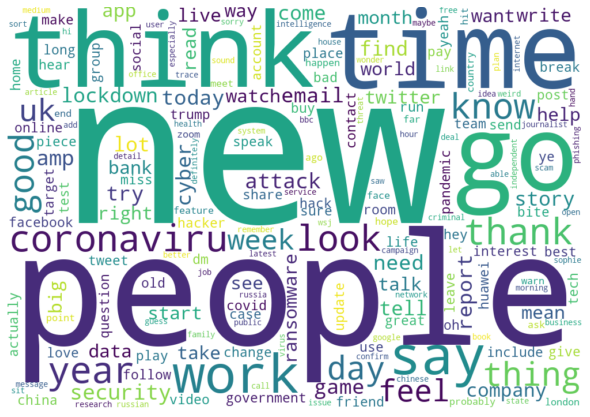

In [167]:
#tweet corpus wordcloud
text = str(normalized_corpus)
wordcloud_plot(text)

# Hashtags

In [18]:
#creating a dataframe with only the tweets with hashtags
df_hashtag = df[df['hashtag1'].apply(lambda x: len(x)) > 0]

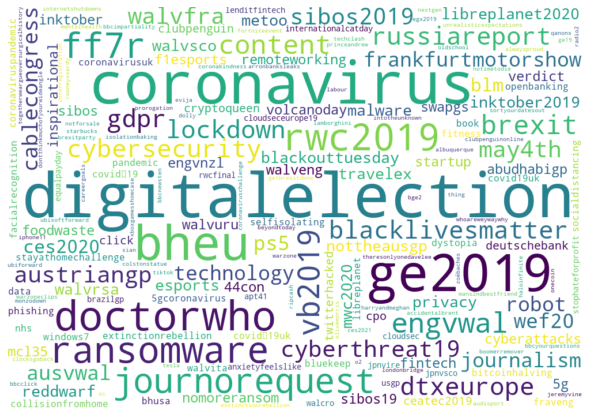

In [34]:
#hashtag wordcloud
hashtag_corpus = df_hashtag.hashtag1.sum()
hashtag_corpus = ' '.join(hashtag_corpus).lower()
hashtag_wordplot = wordcloud_plot(hashtag_corpus)
hashtag_wordplot



The idea of correlating the hastags came from https://github.com/enoreese

In [171]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in df_hashtag.hashtag1
    for hashtag in hashtags_list],
    columns=['hashtag'])
flattened_hashtags_df.head()
len(flattened_hashtags_df)

654

In [172]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

414

In [173]:
# count of appearances of each hashtag
num_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
num_hashtags.head(10)

,hashtag,counts
0,coronavirus,53
1,BHUSA,13
2,FF7R,13
3,COVID19,12
4,lockdown,8
5,fintech,7
6,LibrePlanet2020,7
7,cybersecurity,7
8,BlackLivesMatter,7
9,Coronavirus,7


In [174]:
len(num_hashtags)

414

In [175]:
'''Find Correlated Hashtags
We will need to turn the text into numeric form. 
It is possible to do this by transforming from a list of hashtags 
to a vector representing which hashtags appeared in which rows.'''

# take hashtags which appear at least this amount of times
min_appearance = 5

# find popular hashtags - make into python set for efficiency
popular_hashtags = set(num_hashtags[
                           num_hashtags.counts>=min_appearance
                           ]['hashtag'])
len(popular_hashtags)


18

In [176]:
popular_hashtags

{'AustrianGP',
 'BHUSA',
 'BlackLivesMatter',
 'CES2020',
 'COVID19',
 'Coronavirus',
 'FF7R',
 'LibrePlanet2020',
 'May4th',
 'PS5',
 'RussiaReport',
 'coronavirus',
 'cybersecurity',
 'fintech',
 'journalism',
 'journorequest',
 'lockdown',
 'technology'}

In [177]:
'''Next we are going to create a new column in df_hashtag which filters 
the hashtags to only the popular hashtags. 
We will also drop the rows where no popular hashtags appear.'''

# make a new column with only the popular hashtags
df_hashtag['popular_hashtags'] =df_hashtag.hashtag1.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags])

# drop rows without popular hashtag
popular_hashtags_list_df = df_hashtag.loc[
            df_hashtag.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

len(popular_hashtags_list_df)

<ipython-input-177-b8c834c3fa36>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hashtag['popular_hashtags'] =df_hashtag.hashtag1.apply(


166

In [178]:
'''Next we want to vectorise our the hashtags
To do this, we create a dataframe where the hashtags contained in each row are in vector form.'''

# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [179]:
# Drop popular_hashtags columns
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

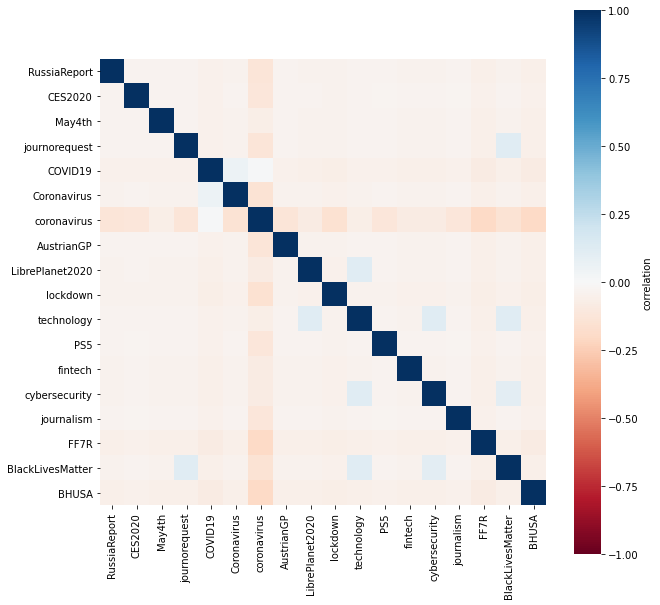

In [180]:
import seaborn as sns

# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()



# combining hashtag infor with tweet 

In [181]:
df['tweet&hashtag'] = df['ngram']+ df['hashtag1']
df['tweet&hashtag'][53]

['approximately',
 'fifth_patient',
 'admit',
 'german',
 'hospital',
 'february',
 'mid',
 'april',
 'die',
 'patient',
 'COVID']

# LDA

In [182]:
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

#and this is from: https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
id_map = Dictionary(df['tweet&hashtag'])

count = 0
for k, v in id_map.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
        
# creating a dictionary reporting how many words and how many times those words appear
bow_corpus = [id_map.doc2bow(doc) for doc in df['tweet&hashtag']]

# Preview Bag Of Words for our sample preprocessed document.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               id_map[bow_doc_0[i][0]], 
                                                     bow_doc_0[i][1]))


0 beirut_explosion
1 deep
2 gumshoe
3 neglect
4 official
5 report
6 seven
7 wsj
8 year
9 amp
10 back
Word 0 ("beirut_explosion") appears 1 time.
Word 1 ("deep") appears 1 time.
Word 2 ("gumshoe") appears 1 time.
Word 3 ("neglect") appears 1 time.
Word 4 ("official") appears 1 time.
Word 5 ("report") appears 1 time.
Word 6 ("seven") appears 1 time.
Word 7 ("wsj") appears 1 time.
Word 8 ("year") appears 1 time.


# LDA using TfidfModel

Tf-idf, or term frequency-inverse document frequency, assigns a weight for term j in document i 
Intuitively, a term has a large weight when it occurs frequently across the document but infrequently across the corpus.
The word “build” might appear often in a document, but because it’s likely fairly common in the rest of the corpus, it will not have a high tf-idf score. However, if the word “gentrification” appears often in a document, because it is rarer in the rest of the corpus, it will have a higher tf-idf score.

In [183]:
# Create tf-idf model object using models.TfidfModel on 'corpus’ and save it to ‘tfidf’, 
# TfidfModel is short for term frequency-inverse document frequency: a numeric stat reflecting how important a word is
# increases proportionally to the number of times a word appears in a doc.
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)

# then apply transformation to the entire corpus and call it ‘corpus_tfidf’
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.4059906893143262),
 (1, 0.3228098656977167),
 (2, 0.4398118466037888),
 (3, 0.4398118466037888),
 (4, 0.26920459966292665),
 (5, 0.20046575318741083),
 (6, 0.37216953202486364),
 (7, 0.24340038234914407),
 (8, 0.18353443436108394)]


# Evaluation of LDA


In [ ]:
print(bow_corpus[0])
print(corpus_tfidf[0])

In [ ]:
len(bow_corpus)

In [ ]:
# Evaluating the bag of words LDA model 
#Where woudl the text tweet [0] be classified?
# Notice this tweet has nothing to do with these words!
for index, score in sorted(lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


In [ ]:
# Evaluating the bag of words tf-idf LDA model 

for index, score in sorted(lda_model_tfidf[corpus_tfidf[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score 
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tweet&hashtag'], dictionary=id_map, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score for bow_lda_model: ', coherence_lda)

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=df['tweet&hashtag'], dictionary=id_map, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score for tfidf_lda_model: ', coherence_lda)

# Hyperparameter tuning

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

Model hyperparameters can be thought of as settings for a machine learning algorithm that are tuned by the data scientist before training. Examples would be the number of trees in the random forest, or in our case, number of topics K

Model parameters can be thought of as what the model learns during training, such as the weights for each word in a given topic

Now that we have the baseline coherence score for the default LDA model, let’s perform a series of sensitivity tests to help determine the following model hyperparameters:
1/ Number of Topics (K)
2/ Dirichlet hyperparameter alpha: Document-Topic Density
3/ Dirichlet hyperparameter beta: Word-Topic Density

We’ll perform these tests in sequence, one parameter at a time by keeping others constant and run them over the two different validation corpus sets. We’ll use C_v as our choice of metric for performance comparison

In [184]:
from gensim.models import CoherenceModel

# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id_map,
                                           num_topics=k,
                                           alpha=a,
                                           eta=b,
                                           random_state=0,
                                           chunksize=20000,
                                           passes=2,
                                           workers=14,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tweet&hashtag'], dictionary=id_map, coherence='c_v')
    
    return coherence_model_lda.get_coherence()



In [ ]:
import tqdm

grid = {}
grid['Validation_Set'] = {}

corpus = corpus_tfidf

# Topics range
min_topics = 5
max_topics = 45
step_size = 5
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=241)
    
    # iterate through number of topics
    for k in topics_range:
        # iterate through alpha values
        for a in alpha:
            # iterare through beta values
            for b in beta:
                # get the coherence score for the given parameters
                cv = compute_coherence_values(corpus=corpus, dictionary=id_map, k=k, a=a, b=b)
                # Save the model results
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)
                print(cv)    
                
                pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()


In [ ]:
df_results = pd.DataFrame(model_results)
df_results = df_results.sort_values(by = ['Coherence'], ascending=False)
df_results[0:20]

In [185]:
# choosing the best model

corpus = corpus_tfidf
dictionary = id_map
k = 40
a = 'symmetric'
b = 0.01

lda_model_tfidf = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id_map,
                                       num_topics=k,
                                       alpha=a,
                                       eta=b,
                                       random_state=0,
                                       chunksize=20000,
                                       passes=20,
                                       workers=12,
                                       per_word_topics=True)

In [186]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.010*"piece" + 0.010*"leave" + 0.009*"FF7R" + 0.009*"drink" + 0.008*"alright" + 0.008*"market" + 0.007*"year_ago" + 0.007*"actually" + 0.007*"neighbour" + 0.007*"get"
Topic: 1 
Words: 0.010*"close" + 0.009*"point" + 0.009*"hop" + 0.009*"awful" + 0.008*"picture" + 0.007*"london" + 0.007*"rip" + 0.006*"relate" + 0.006*"choice" + 0.005*"joy"
Topic: 2 
Words: 0.021*"amaze" + 0.012*"remember" + 0.010*"awesome" + 0.010*"morning" + 0.009*"right" + 0.008*"check" + 0.007*"feel" + 0.007*"worth" + 0.007*"learn" + 0.006*"fallout"
Topic: 3 
Words: 0.010*"excite" + 0.008*"st" + 0.008*"inside" + 0.007*"interest" + 0.007*"key" + 0.006*"far" + 0.006*"twitter" + 0.006*"clear" + 0.006*"pressure" + 0.005*"plant"
Topic: 4 
Words: 0.023*"yikes" + 0.009*"lol" + 0.008*"terrify" + 0.008*"break" + 0.007*"tomorrow" + 0.007*"welcome" + 0.007*"go" + 0.006*"little" + 0.006*"holiday" + 0.006*"oops"
Topic: 5 
Words: 0.013*"good_luck" + 0.010*"true" + 0.008*"feature" + 0.008*"late" + 0.007*"dream" + 

In [187]:
get_document_topics = [lda_model_tfidf.get_document_topics(i) for i in corpus]
df['topic_distribution'] = get_document_topics

In [63]:
len(get_document_topics)

8215

In [188]:
df.to_csv('cyber_tweet_df_all.csv', index=False)

# Visualisation 

In [64]:
!pip install pyldavis==2.1.2

In [65]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

corpus = corpus_tfidf

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus, id_map)
LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
29     0.119759  0.023714       1        1  3.443380
9      0.103207  0.078523       2        1  3.374861
21     0.051456  0.024645       3        1  2.914010
25     0.097272  0.044240       4        1  2.799021
17     0.037047  0.045027       5        1  2.763141
26     0.010585 -0.004384       6        1  2.727941
2      0.055157 -0.159218       7        1  2.686745
33    -0.005744 -0.033143       8        1  2.677669
23     0.018039  0.053882       9        1  2.646560
32     0.018198  0.147282      10        1  2.637802
0     -0.051502  0.101181      11        1  2.624157
19    -0.025518 -0.035340      12        1  2.618583
12     0.056669 -0.003904      13        1  2.605567
34     0.012238  0.003119      14        1  2.525858
22     0.103125 -0.082843      15        1  2.512794
3     -0.066841 -0.033825      16        1  2.502769
7     -0.000335  0.043551      17        1  2.491544
36     0.074934 -0.068772      18        1  2.485912
10    -0.002436  0.008884      19        1  2.479493
5     -0.081227  0.007962      20        1  2.464350
38    -0.066199  0.009526      21        1  2.452382
20     0.028271 -0.065911      22        1  2.448291
31     0.002946  0.054840      23        1  2.447088
27     0.001029  0.047056      24        1  2.446129
13    -0.041303  0.012998      25        1  2.419493
1     -0.050563 -0.024206      26        1  2.398806
18     0.009088  0.019897      27        1  2.387634
35    -0.032960 -0.076115      28        1  2.357736
6      0.029155  0.014406      29        1  2.355355
15     0.010809 -0.010757      30        1  2.296005
11     0.036437 -0.047679      31        1  2.286207
39    -0.034971  0.004373      32        1  2.281869
8     -0.031204  0.010330      33        1  2.278415
37    -0.068539 -0.004296      34        1  2.271784
24    -0.078250  0.023371      35        1  2.227322
14    -0.073559 -0.072837      36        1  2.211375
28    -0.038968 -0.026084      37        1  2.208254
4     -0.005788 -0.038918      38        1  2.208132
16    -0.027478  0.000484      39        1  2.171311
30    -0.092033  0.008941      40        1  1.864253, topic_info=          Term       Freq      Total Category  logprob  loglift
189      thank  60.000000  60.000000  Default  30.0000  30.0000
2603       yes  31.000000  31.000000  Default  29.0000  29.0000
1780        dm  18.000000  18.000000  Default  28.0000  28.0000
99          oh  20.000000  20.000000  Default  27.0000  27.0000
5252       yep  14.000000  14.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
2461  approach   1.101253   5.119942  Topic40  -5.8945   2.4456
738       week   1.212432  25.394981  Topic40  -5.7984   0.9404
2051      bite   1.146997  16.315874  Topic40  -5.8538   1.3273
46        give   1.144224  18.093557  Topic40  -5.8563   1.2215
107       find   1.134159  25.127373  Topic40  -5.8651   0.8842

[2266 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
10757     28  0.805397  AustrianGP
9557      26  0.543318       BHUSA
459        9  0.786046       COVID
1713      14  0.762952     COVID19
12710     16  0.672612   F1Esports
...      ...       ...         ...
3311      18  0.345262        zoom
3311      27  0.172631        zoom
7751      18  0.655603        zuck
14525      6  0.650021  zuckerberg
14525     37  0.325011  zuckerberg

[4746 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[30, 10, 22, 26, 18, 27, 3, 34, 24, 33, 1, 20, 13, 35, 23, 4, 8, 37, 11, 6, 39, 21, 32, 28, 14, 2, 19, 36, 7, 16, 12, 40, 9, 38, 25, 15, 29, 5, 17, 31])

In [66]:
top_words_per_topic = []
for t in range(lda_model_tfidf.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in lda_model_tfidf.show_topic(t, topn = 25)])

df_topics = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])
words = df_topics.groupby(['Topic'])['Word'].apply(lambda x: ', '.join([(i) for i in x]))
prob = df_topics.groupby(['Topic'])['P'].apply(list)
words = words.str.split(',')

df_words = pd.DataFrame(words)
df_words['p'] = prob
df_words

,Word,p
Topic,,
0,"[piece, leave, FF7R, drink, alright, mark...","[0.00957650225609541, 0.00956072099506855, 0.0..."
1,"[close, point, hop, awful, picture, londo...","[0.00971490889787674, 0.009210638701915741, 0...."
2,"[amaze, remember, awesome, morning, right,...","[0.020879579707980156, 0.012394333258271217, 0..."
3,"[excite, st, inside, interest, key, far, ...","[0.009865225292742252, 0.008276797831058502, 0..."
4,"[yikes, lol, terrify, break, tomorrow, we...","[0.023325016722083092, 0.008679559454321861, 0..."
5,"[good_luck, true, feature, late, dream, c...","[0.013209349475800991, 0.009700829163193703, 0..."
6,"[word, argh, whoa, look, fine, wonder, c...","[0.017582811415195465, 0.013959583826363087, 0..."
7,"[hear, feel_like, sorry_hear, work_independ...","[0.016331156715750694, 0.011769485659897327, 0..."
8,"[bbc_news, definitely, old, general, cute,...","[0.01936296932399273, 0.009366754442453384, 0...."


In [67]:
def plot_topics(text1, text2):
    d = {w: f for w, f in
        zip(text1,
            text2)}
    wordcloud = WordCloud(background_color='white', prefer_horizontal=1)
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


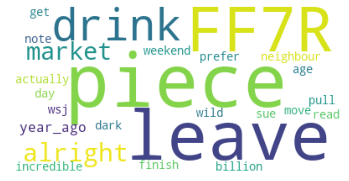

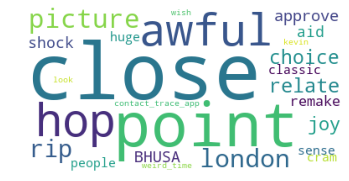

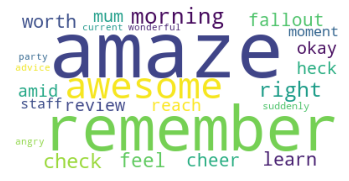

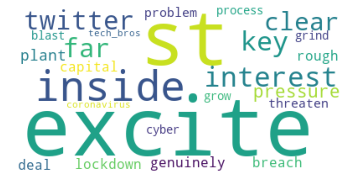

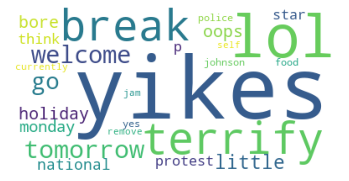

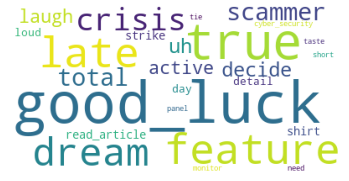

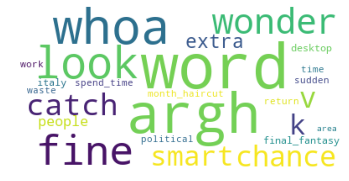

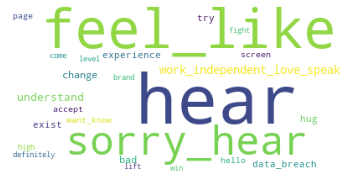

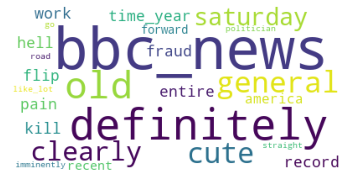

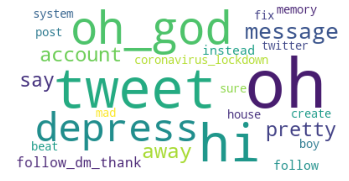

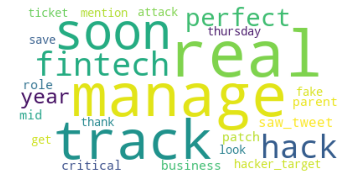

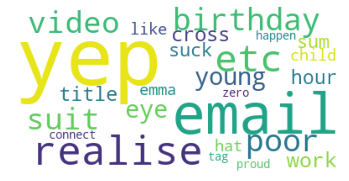

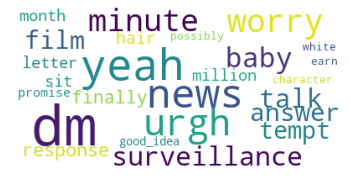

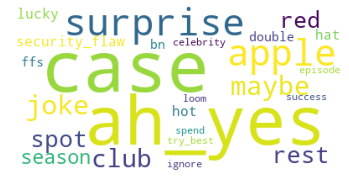

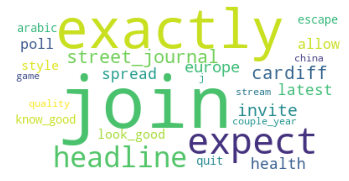

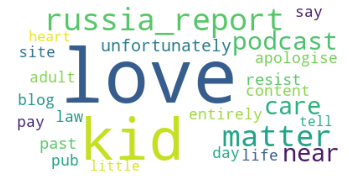

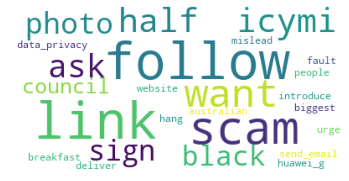

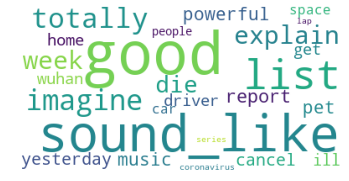

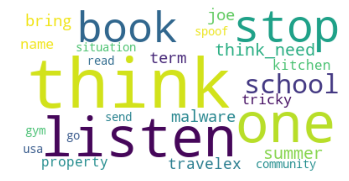

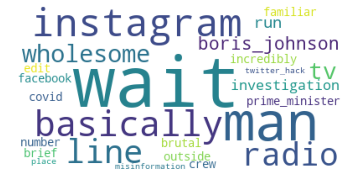

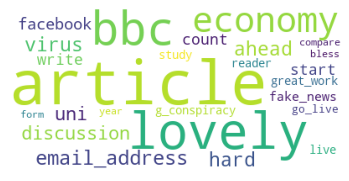

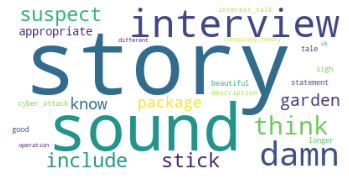

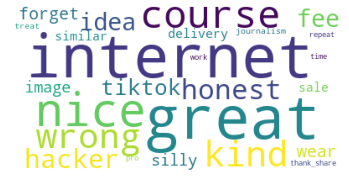

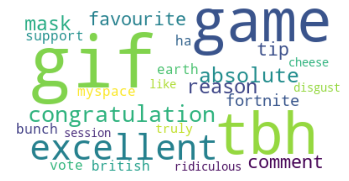

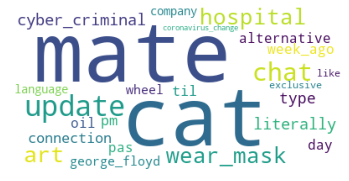

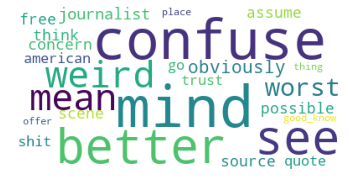

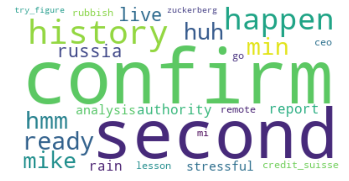

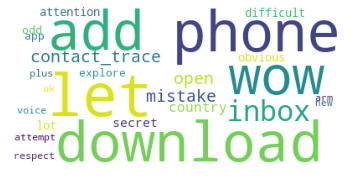

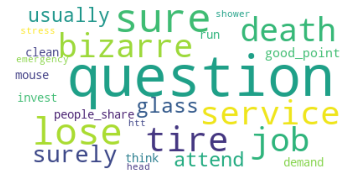

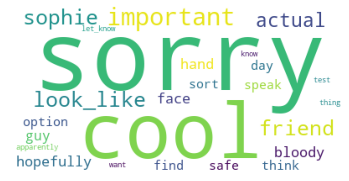

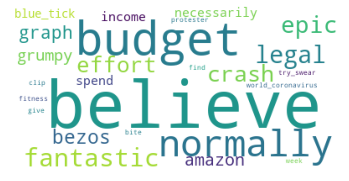

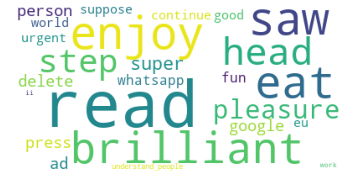

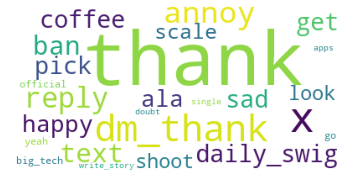

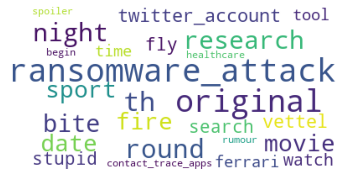

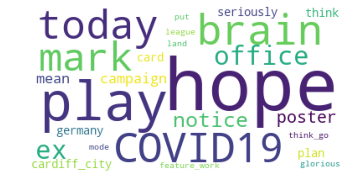

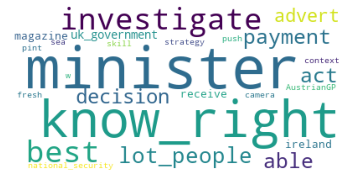

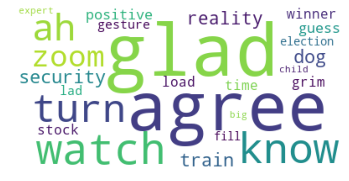

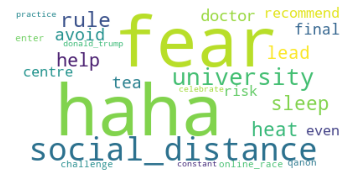

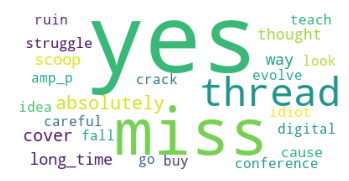

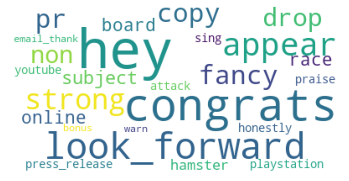

In [68]:
for i in range(len(df_words)):
    plot_topics(df_words['Word'][i], df_words['p'][i])

# Pooling tweets 

In [69]:
#Lets look at how many tweets per journalist
#per_2020 = df.groupby('year').count()

per_2020 = df


In [70]:
#pooling tweets by journalist:

per_2020_user = per_2020.groupby('name')['clean_tweet'].apply(lambda x: ' '.join([str(i) for i in x]))
df_per_2020_user = pd.DataFrame(per_2020_user) 
df_per_2020_user

,clean_tweet
name,
Adam Bannister,"Hi, I’m a journalist at The Daily Swig and a..."
Dan Simmons,Have you got anywhere or do you still need a ...
Danny Palmer,"Nah, I'm alright without, thanks. 😅 Excuse m..."
Gordon Corera,US Intel issues election update: “CHINA – We ...
Hannah Murphy,RT : With the announcement that Sen. Kamala Ha...
Jessica Haworth,RT : These Know .. Paragon Cyber Founder | H...
Joe Tidy,RT : I'll never forget the Aussie that came ou...
Leo Kelion,Independent surveillance camera commissioner’s...
Lucy Ingham,"The is going to be made much worse by a , and..."


In [71]:
normalized = normalized_df_text(df_per_2020_user['clean_tweet'])
df_per_2020_user['normalized_tweet'] = normalized
df_per_2020_user['tokenized_tweet'] = tokenized_df_text(df_per_2020_user['normalized_tweet'])
df_per_2020_user['bigrams'] = make_bigrams(df_per_2020_user['tokenized_tweet'])
df_per_2020_user['ngram'] = make_trigrams(df_per_2020_user['bigrams'])

In [72]:
#making a bow corpus
id_map = Dictionary(df_per_2020_user['ngram'])

count = 0
for k, v in id_map.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
        
# creating a dictionary reporting how many words and how many times those words appear
bow_corpus = [id_map.doc2bow(doc) for doc in df_per_2020_user['ngram']]

# Preview Bag Of Words for our sample preprocessed document.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               id_map[bow_doc_0[i][0]], 
                                                     bow_doc_0[i][1]))

#turn bow-corpus into tfidf corpus
tfidf = models.TfidfModel(bow_corpus)

# then apply transformation to the entire corpus and call it ‘corpus_tfidf’
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

0 able
1 able_answer
2 abuse
3 access_delhi
4 accord_best
5 account
6 act
7 action
8 actionview
9 actual
10 actually
Word 0 ("able") appears 1 time.
Word 1 ("able_answer") appears 1 time.
Word 2 ("abuse") appears 1 time.
Word 3 ("access_delhi") appears 1 time.
Word 4 ("accord_best") appears 1 time.
Word 5 ("account") appears 1 time.
Word 6 ("act") appears 2 time.
Word 7 ("action") appears 1 time.
Word 8 ("actionview") appears 1 time.
Word 9 ("actual") appears 1 time.
Word 10 ("actually") appears 3 time.
Word 11 ("ad") appears 2 time.
Word 12 ("addition") appears 1 time.
Word 13 ("addr") appears 1 time.
Word 14 ("adequate") appears 1 time.
Word 15 ("admins") appears 1 time.
Word 16 ("adult") appears 1 time.
Word 17 ("advance") appears 1 time.
Word 18 ("adversarial") appears 1 time.
Word 19 ("afraid") appears 1 time.
Word 20 ("agency") appears 1 time.
Word 21 ("agency_spend") appears 2 time.
Word 22 ("ago") appears 3 time.
Word 23 ("ai") appears 1 time.
Word 24 ("aim_help") appears 1 tim

[(0, 0.006446211528699956),
 (1, 0.03950582571295745),
 (2, 0.017466082923452454),
 (3, 0.02848595431820495),
 (4, 0.02848595431820495),
 (5, 0.006446211528699956),
 (6, 0.009147319732105079),
 (7, 0.0028986053246835434),
 (8, 0.03950582571295745),
 (9, 0.011019871394752497),
 (10, 0.013720979598157618),
 (11, 0.012892423057399911),
 (12, 0.022039742789504994),
 (13, 0.03950582571295745),
 (14, 0.03950582571295745),
 (15, 0.03950582571295745),
 (16, 0.01391847671943604),
 (17, 0.011019871394752497),
 (18, 0.03950582571295745),
 (19, 0.022039742789504994),
 (20, 0.01391847671943604),
 (21, 0.0790116514259149),
 (22, 0.01933863458609987),
 (23, 0.011019871394752497),
 (24, 0.02848595431820495),
 (25, 0.02848595431820495),
 (26, 0.017466082923452454),
 (27, 0.017466082923452454),
 (28, 0.03493216584690491),
 (29, 0.0028986053246835434),
 (30, 0.03950582571295745),
 (31, 0.03950582571295745),
 (32, 0.0045736598660525395),
 (33, 0.01391847671943604),
 (34, 0.0028986053246835434),
 (35, 0.02

In [ ]:
grid = {}
grid['Validation_Set'] = {}

corpus = corpus_tfidf

# Topics range
min_topics = 5
max_topics = 45
step_size = 5
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=241)
    
    # iterate through number of topics
    for k in topics_range:
        # iterate through alpha values
        for a in alpha:
            # iterare through beta values
            for b in beta:
                # get the coherence score for the given parameters
                cv = compute_coherence_values(corpus=corpus, dictionary=id_map, k=k, a=a, b=b)
                # Save the model results
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)
                print(cv)    
                
                pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results_bow_corpus.csv', index=False)
    pbar.close()

In [ ]:
df_results = pd.DataFrame(model_results)
df_results = df_results.sort_values(by = ['Coherence'], ascending=False)
df_results[0:20]

In [73]:
# chosing an alright model but with fewer topics 
corpus2 = corpus_tfidf
dictionary = id_map
k = 40
a = 0.91
b = 0.91
    
lda_model_tfidf2 = gensim.models.LdaMulticore(corpus=corpus2,
                                       id2word=id_map,
                                       num_topics=k,
                                       alpha=a,
                                       eta=b,
                                       random_state=0,
                                       chunksize=20000,
                                       passes=20,
                                       workers=12,
                                       per_word_topics=True)


In [74]:
corpus2 = corpus_tfidf

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_tfidf2, corpus2, id_map)
LDAvis_prepared


PreparedData(topic_coordinates=         x    y  topics  cluster      Freq
topic                                     
24     0.0  0.0       1        1  2.502011
0     -0.0  0.0       2        1  2.501531
10    -0.0  0.0       3        1  2.501420
30     0.0 -0.0       4        1  2.501310
22    -0.0 -0.0       5        1  2.501253
39    -0.0  0.0       6        1  2.501166
38    -0.0 -0.0       7        1  2.501094
29     0.0  0.0       8        1  2.500981
13     0.0 -0.0       9        1  2.500937
11    -0.0 -0.0      10        1  2.500759
9      0.0 -0.0      11        1  2.500705
23     0.0  0.0      12        1  2.500507
8     -0.0 -0.0      13        1  2.500374
18    -0.0  0.0      14        1  2.500333
36    -0.0  0.0      15        1  2.500265
33     0.0 -0.0      16        1  2.500145
37     0.0  0.0      17        1  2.500121
1     -0.0 -0.0      18        1  2.500110
34     0.0  0.0      19        1  2.500110
31    -0.0  0.0      20        1  2.500057
32     0.0  0.0      21        1  2.500016
6      0.0 -0.0      22        1  2.499972
20    -0.0 -0.0      23        1  2.499946
19     0.0 -0.0      24        1  2.499828
3     -0.0 -0.0      25        1  2.499776
2      0.0  0.0      26        1  2.499768
12    -0.0 -0.0      27        1  2.499633
26     0.0 -0.0      28        1  2.499625
7     -0.0 -0.0      29        1  2.499565
15    -0.0 -0.0      30        1  2.499557
4     -0.0 -0.0      31        1  2.499451
27     0.0  0.0      32        1  2.499421
5      0.0 -0.0      33        1  2.499321
25     0.0 -0.0      34        1  2.499300
28     0.0  0.0      35        1  2.499149
21    -0.0 -0.0      36        1  2.498788
16    -0.0 -0.0      37        1  2.498572
35     0.0  0.0      38        1  2.498507
17     0.0  0.0      39        1  2.497585
14     0.0  0.0      40        1  2.497036, topic_info=                              Term      Freq     Total Category  logprob  \
7678                  illustration  0.000000  0.000000  Default  30.0000   
3824                      instance  0.000000  0.000000  Default  29.0000   
3057                         floor  0.000000  0.000000  Default  28.0000   
7726                          last  0.000000  0.000000  Default  27.0000   
7866                  possible_use  0.000000  0.000000  Default  26.0000   
...                            ...       ...       ...      ...      ...   
6596                        tiktok  0.000693  0.027770  Topic40  -9.6024   
206                   cyber_attack  0.000693  0.027765  Topic40  -9.6026   
386                             hi  0.000693  0.027762  Topic40  -9.6027   
5851                           see  0.000693  0.027764  Topic40  -9.6026   
12958  work_independent_love_speak  0.000693  0.027755  Topic40  -9.6029   

       loglift  
7678      30.0  
3824      29.0  
3057      28.0  
7726      27.0  
7866      26.0  
...        ...  
6596      -0.0  
206        0.0  
386        0.0  
5851       0.0  
12958     -0.0  

[2209 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[25, 1, 11, 31, 23, 40, 39, 30, 14, 12, 10, 24, 9, 19, 37, 34, 38, 2, 35, 32, 33, 7, 21, 20, 4, 3, 13, 27, 8, 16, 5, 28, 6, 26, 29, 22, 17, 36, 18, 15])

In [80]:
get_document_topics2 = [lda_model_tfidf2.get_document_topics(i) for i in corpus2]
df_per_2020_user['topic_distribution'] = get_document_topics2

In [81]:
len(get_document_topics2)

12

In [83]:
get_document_topics_unpacked= []
for row in get_document_topics2: 
    temp = [[ i for i, j in row], [ j for i, j in row]]
    get_document_topics_unpacked.append(temp)

topics=[]
distribution=[]
for row in get_document_topics_unpacked:
    temp1 = row[0]
    temp2 = row[1]
    topics.append(temp1)
    distribution.append(temp2)

df_per_2020_user['topics'] = topics
df_per_2020_user['distribution'] = distribution
df_per_2020_user.reset_index(inplace=True)

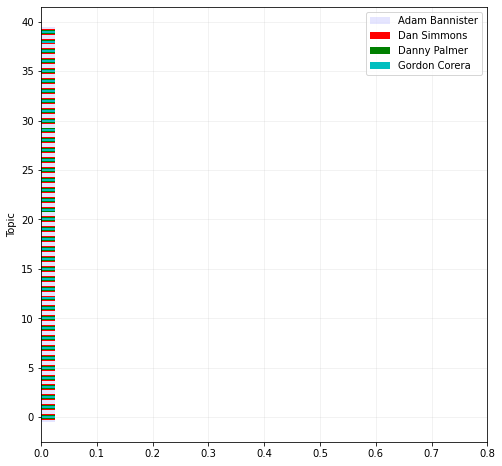

In [84]:
plt.figure(figsize = [8,8])
plt.barh(df_per_2020_user['topics'][0],df_per_2020_user['distribution'][0],height = 1.0, color='b',alpha=0.1,label=df_per_2020_user['name'][0])
plt.barh(df_per_2020_user['topics'][1],df_per_2020_user['distribution'][1],height = 0.6, color='r',label=df_per_2020_user['name'][1])
plt.barh(df_per_2020_user['topics'][2],df_per_2020_user['distribution'][2],height = 0.4, color='g',label=df_per_2020_user['name'][2])
plt.barh(df_per_2020_user['topics'][3],df_per_2020_user['distribution'][3],height = 0.2, color='c',label=df_per_2020_user['name'][3])
plt.xlim([0,0.8])
plt.ylabel('Topic')
#plt.ylim([n_topics-0.5,-0.5])
#plt.yticks(index_topics, topic_labels)
plt.grid(alpha=0.2)
plt.legend()
plt.show()

# Better way of looking at how journalists interests are spread

In [189]:

get_document_topics_unpacked= []
for row in get_document_topics: 
    temp = [[ i for i, j in row], [ j for i, j in row]]
    get_document_topics_unpacked.append(temp)

topics=[]
distribution=[]
for row in get_document_topics_unpacked:
    temp1 = row[0]
    temp2 = row[1]
    topics.append(temp1)
    distribution.append(temp2)

df['topics'] = topics
df['distribution'] = distribution
df.head()

,Unnamed: 0,user_id,name,screen_name,location,user_description,user_friends_n,user_followers_n,listed_count,prof_created_at,...,no_punct_text,normalized_tweet,tokenized_tweet,bigrams,ngram,fully_processed,tweet&hashtag,topic_distribution,topics,distribution
0,0,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,"[RT, Behind, the, Beirut, Explosion, Seven, Ye...",[beirut explosion seven year official neglect ...,"[beirut, explosion, seven, year, official, neg...","[beirut_explosion, seven, year, official, negl...","[beirut_explosion, seven, year, official, negl...",[beirut explosion seven year official neglect ...,"[beirut_explosion, seven, year, official, negl...","[(14, 0.23581843), (17, 0.39735484)]","[14, 17]","[0.23581843, 0.39735484]"
1,1,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,"[RT, The, Bill, amp, Melinda, Gates, Foundatio...",[bill amp melinda gate foundation say back wor...,"[bill, amp, melinda, gate, foundation, say, ba...","[bill, amp, melinda, gate_foundation, say, bac...","[bill, amp, melinda, gate_foundation, say, bac...",[bill amp melinda gate foundation say back wor...,"[bill, amp, melinda, gate_foundation, say, bac...","[(17, 0.78272015)]",[17],[0.78272015]
2,2,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,"[In, a, public, report, senior, counterintelli...",[public report senior counterintelligence offi...,"[public, report, senior, counterintelligence, ...","[public, report, senior, counterintelligence_o...","[public, report, senior, counterintelligence_o...",[public report senior counterintelligence offi...,"[public, report, senior, counterintelligence_o...","[(26, 0.12707253), (28, 0.14308612), (34, 0.50...","[26, 28, 34]","[0.12707253, 0.14308612, 0.5099123]"
3,3,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,"[RT, A, heartbreaking, tale, beautifully, told...",[heartbreaking tale beautifully tell],"[heartbreaking, tale, beautifully, tell]","[heartbreaking, tale, beautifully, tell]","[heartbreaking, tale, beautifully, tell]",[heartbreaking tale beautifully tell],"[heartbreaking, tale, beautifully, tell]","[(18, 0.20865583), (21, 0.46935698)]","[18, 21]","[0.20865583, 0.46935698]"
4,4,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,"[RT, The, Trump, administration, just, recomme...",[trump administration recommend plan force chi...,"[trump, administration, recommend, plan, force...","[trump_administration, recommend, plan, force,...","[trump_administration, recommend, plan, force,...",[trump administration recommend plan force chi...,"[trump_administration, recommend, plan, force,...","[(10, 0.30261692), (37, 0.4234294)]","[10, 37]","[0.30261692, 0.4234294]"


In [190]:
# convert list of tuples to dict for each element in series
df_topics_unpacked = pd.DataFrame(list(map(dict, df['topic_distribution']))).copy()
df = pd.concat([df, df_topics_unpacked], axis=1)

In [87]:
column_names = list(df.columns)
column_names

['Unnamed: 0',
 'user_id',
 'name',
 'screen_name',
 'location',
 'user_description',
 'user_friends_n',
 'user_followers_n',
 'listed_count',
 'prof_created_at',
 'favourites_count',
 'verified',
 'statuses_count',
 'contributors_enabled',
 'tweet_created_at',
 'tweet_id',
 'text',
 'truncated',
 'display_text_range',
 'source',
 'source_url',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'in_reply_to_screen_name',
 'is_quote_status',
 'retweet_count',
 'favourite_count',
 'hashtags',
 'mentions',
 'source_device',
 'retweeted',
 'retweet_text',
 'quote_text',
 'quote_screen_name',
 'year',
 'month',
 'date',
 'hour',
 'minute',
 'second',
 'callouts',
 'hashtag1',
 'is_retweet',
 'clean_tweet',
 'no_punct_text',
 'normalized_tweet',
 'tokenized_tweet',
 'bigrams',
 'ngram',
 'fully_processed',
 'tweet&hashtag',
 'topic_distribution',
 'topics',
 'distribution',
 14,
 17,
 26,
 28,
 34,
 18,
 21,
 10,
 37,
 0,
 3,
 24,
 4,
 12,
 29,
 19,
 9,
 8,
 22,
 1,
 2,
 5,
 6,
 7,
 11,
 13,

In [191]:
df = df.rename({0: 'topic_0', 1: 'topic_1', 2: 'topic_2', 3: 'topic_3', 4: 'topic_4', 5: 'topic_5', 
                6: 'topic_6', 7: 'topic_7', 8: 'topic_8', 9: 'topic_9', 10: 'topic_10',
               11: 'topic_11', 12: 'topic_12', 13: 'topic_13', 14: 'topic_14', 15: 'topic_15',
               16: 'topic_16', 17: 'topic_17', 18: 'topic_18', 19: 'topic_19', 20: 'topic_20',
               21: 'topic_21', 22: 'topic_22', 23: 'topic_23', 24: 'topic_24', 25: 'topic_25',
               26: 'topic_26', 27: 'topic_27', 28: 'topic_28', 29: 'topic_29', 30: 'topic_30',
               31: 'topic_31', 32: 'topic_32', 33: 'topic_33', 34: 'topic_34', 35: 'topic_35',
               36: 'topic_36', 37: 'topic_37', 38: 'topic_38', 39: 'topic_39'}, axis=1)

In [223]:
df_user7 = df.groupby('name').count()
df_user7

,Unnamed: 0,user_id,screen_name,location,user_description,user_friends_n,user_followers_n,listed_count,prof_created_at,favourites_count,...,topic_25,topic_27,topic_30,topic_31,topic_32,topic_33,topic_35,topic_36,topic_38,topic_39
name,,,,,,,,,,,,,,,,,,,,,
Adam Bannister,175,175,175,0,175,175,175,175,175,175,...,0,0,0,0,0,0,0,0,0,0
Dan Simmons,23,23,23,23,23,23,23,23,23,23,...,12,11,10,10,12,10,11,10,10,10
Danny Palmer,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,...,0,0,0,0,0,0,0,0,0,0
Gordon Corera,261,261,261,0,261,261,261,261,261,261,...,0,0,0,0,0,0,0,0,0,0
Hannah Murphy,344,344,344,344,344,344,344,344,344,344,...,0,0,0,0,0,0,0,0,0,0
Jessica Haworth,71,71,71,0,71,71,71,71,71,71,...,0,0,0,0,0,0,0,0,0,0
Joe Tidy,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,...,0,0,0,0,0,0,0,0,0,0
Leo Kelion,457,457,457,457,457,457,457,457,457,457,...,185,170,161,171,168,176,173,178,174,166
Lucy Ingham,260,260,260,260,260,260,260,260,260,260,...,0,0,0,0,0,0,0,0,0,0


In [192]:


df_per_user = df.groupby('name')['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 
                'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10',
                'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15',
                'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20',
                'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25',
                'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30',
                'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35',
                'topic_36', 'topic_37', 'topic_38', 'topic_39'].sum()


<ipython-input-192-c246625f1b89>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_per_user = df.groupby('name')['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',


In [193]:
df_per_user['total'] = df_per_user.sum(axis = 1)
df_per_user

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,total
name,,,,,,,,,,,,,,,,,,,,,
Adam Bannister,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Dan Simmons,0.588109,1.113176,0.400587,0.738600,0.926027,0.649430,0.157895,0.157895,0.425971,0.843931,...,0.424506,1.130177,0.157895,0.585846,0.628200,0.157895,0.400178,0.285056,0.157895,19.259589
Danny Palmer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gordon Corera,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hannah Murphy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jessica Haworth,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Joe Tidy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Leo Kelion,13.072679,7.851433,9.645003,7.141307,9.494803,10.650319,10.097317,12.279625,9.015908,14.685976,...,9.187640,7.086603,11.801337,8.381402,6.350822,10.609027,6.809540,11.790806,7.078224,377.276921
Lucy Ingham,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [194]:
df_per_user2 = df_per_user[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 
                'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10',
                'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15',
                'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20',
                'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25',
                'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30',
                'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35',
                'topic_36', 'topic_37', 'topic_38', 'topic_39', 'total']].div(df_per_user.total, axis=0)
df_per_user3 = df_per_user2.copy()

In [205]:
df_per_user3.drop('total', axis=1, inplace=True)
df_per_user3

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39
name,,,,,,,,,,,,,,,,,,,,,
Adam Bannister,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dan Simmons,0.030536,0.057799,0.020799,0.038350,0.048081,0.033720,0.008198,0.008198,0.022117,0.043819,...,0.008198,0.022041,0.058681,0.008198,0.030418,0.032617,0.008198,0.020778,0.014801,0.008198
Danny Palmer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gordon Corera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hannah Murphy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jessica Haworth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joe Tidy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leo Kelion,0.034650,0.020811,0.025565,0.018929,0.025167,0.028229,0.026764,0.032548,0.023897,0.038926,...,0.011712,0.024353,0.018784,0.031280,0.022216,0.016833,0.028120,0.018049,0.031252,0.018761
Lucy Ingham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TypeError: bar() missing 1 required positional argument: 'height'

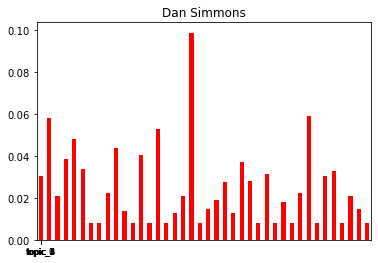

In [220]:


x = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
labels = list(df_per_user3.columns)
row1 = df_per_user3.iloc[1]
row1.plot(kind='bar',title='Dan Simmons', color='r',stacked=False)
#row2 = df.iloc[7]
#row2.plot(kind='bar',title='Binned comparison', color='k',stacked=False)
plt.xticks(x,labels, rotation='horizontal',fontsize=8)
plt.bar(df_per_user3.iloc[[1]])




TypeError: bar() missing 1 required positional argument: 'height'

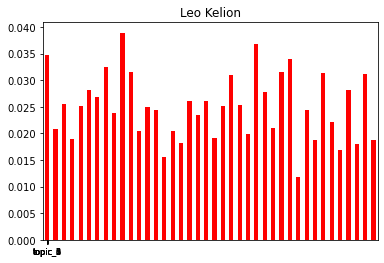

In [217]:
x = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
labels = list(df_per_user3.columns)
#row1 = df_per_user3.iloc[[1]]
#row1.plot(kind='bar',title='Dan Simmons', color='r',stacked=False)
row2 =  df_per_user3.iloc[7]
row2.plot(kind='bar',title='Leo Kelion', color='r',stacked=False)
plt.xticks(x,labels, rotation='horizontal',fontsize=8)
plt.bar(df_per_user3.iloc[[1]])

TypeError: bar() missing 1 required positional argument: 'height'

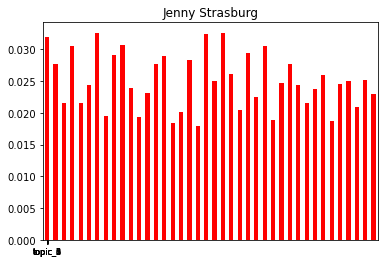

In [219]:
x = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
labels = list(df_per_user3.columns)
row1 =  df_per_user3.iloc[11]
row1.plot(kind='bar',title='Jenny Strasburg', color='r',stacked=False)
plt.xticks(x,labels, rotation='horizontal',fontsize=8)
plt.bar(df_per_user3.iloc[[1]])

In [ ]:
df['max_prob'] = df[['x', 'x']].max(axis=1)

In [ ]:
#df = df.drop('text', axis = 1)
#df = df.drop('clean_tweet', axis = 1)
df.drop('bigrams',axis=1,inplace=True)
df.drop('Unnamed: 0', axis=1,inplace=True)
df.drop('year',axis=1,inplace=True)
df.drop('month',axis=1,inplace=True)
df.drop('hour',axis=1,inplace=True)
df.drop('minute',axis=1,inplace=True)
df.drop('second',axis=1,inplace=True)
df.drop('normalized_tweet',axis=1,inplace=True)
df.drop('tokenized_tweet',axis=1,inplace=True)
df.drop('ngram',axis=1,inplace=True)
df.drop('tweet&hashtag',axis=1,inplace=True)
df.drop('quote_screen_name',axis=1,inplace=True)
df.drop('quote_text',axis=1,inplace=True)
df.drop('source_device',axis=1,inplace=True)
df.drop('is_quote_status',axis=1,inplace=True)
df.drop('in_reply_to_screen_name',axis=1,inplace=True)
df.drop('in_reply_to_user_id',axis=1,inplace=True)
df.drop('contributors_enabled',axis=1,inplace=True)
df.drop('listed_count',axis=1,inplace=True)
df.drop('truncated',axis=1,inplace=True)
df.drop('display_text_range',axis=1,inplace=True)
df.drop('source',axis=1,inplace=True)
df.drop('source_url',axis=1,inplace=True)
df.drop('retweet_text', axis=1,inplace=True)
df.drop('')



df.to_csv('cyber_tweets_modelled_3.csv', index=False)


In [23]:
df.head()

NameError: name 'df' is not defined